In [52]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import math
import pylab
import scipy.stats as stats
%matplotlib inline

In [53]:
cols = [
    'id',
    'host_id',
    'latitude',
    'longitude',
    'property_type',
    'room_type',
    'accommodates',
    'bedrooms',
    'beds',
    'price',
    'number_of_reviews',
    'review_scores_rating',
    'host_listings_count',
    'availability_30',
    'minimum_nights',
]

data_df= pd.read_csv("../Team_5-Airbnb/NYC_listings.csv.csv", usecols=cols)
data_df.head(20)

,id,host_id,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating
0,2539,2787,9.0,40.64529,-73.97238,Private room in rental unit,Private room,2,1.0,1.0,$299.00,30,21,9,4.89
1,2595,2845,6.0,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,NaN,1.0,$175.00,30,0,49,4.68
2,5121,7356,2.0,40.68535,-73.95512,Private room in rental unit,Private room,2,1.0,1.0,$60.00,30,5,50,4.52
3,45910,204539,7.0,40.70309,-73.89963,Entire townhouse,Entire home/apt,16,5.0,10.0,$425.00,30,30,13,4.42
4,5136,7378,1.0,40.66265,-73.99454,Entire rental unit,Entire home/apt,4,2.0,2.0,$275.00,21,0,3,5.00
5,45935,204586,1.0,40.80635,-73.92201,Private room in rental unit,Private room,1,1.0,1.0,$60.00,30,23,0,NaN
6,77765,417504,30.0,40.73777,-73.95366,Room in boutique hotel,Hotel room,2,1.0,1.0,$308.00,2,15,42,4.90
7,5178,8967,1.0,40.76457,-73.98317,Private room in rental unit,Private room,2,1.0,1.0,$68.00,2,2,550,4.23
8,80493,434987,1.0,40.72322,-73.98615,Private room in rental unit,Private room,2,1.0,2.0,$55.00,2,0,207,4.34
9,80684,417504,30.0,40.73756,-73.95350,Room in boutique hotel,Hotel room,4,1.0,2.0,$529.00,2,25,10,5.00


In [54]:
# Determine if there are any missing values in the data
data_df.count()

id                      39881
host_id                 39881
host_listings_count     39831
latitude                39881
longitude               39881
property_type           39881
room_type               39881
accommodates            39881
bedrooms                36098
beds                    38997
price                   39881
minimum_nights          39881
availability_30         39881
number_of_reviews       39881
review_scores_rating    31519
dtype: int64

In [55]:
# Determine if there are any missing values in the data
data_df.isnull().sum()

id                         0
host_id                    0
host_listings_count       50
latitude                   0
longitude                  0
property_type              0
room_type                  0
accommodates               0
bedrooms                3783
beds                     884
price                      0
minimum_nights             0
availability_30            0
number_of_reviews          0
review_scores_rating    8362
dtype: int64

In [56]:
# Drop the NaNs
data_df.dropna()

,id,host_id,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating
0,2539,2787,9.0,40.645290,-73.972380,Private room in rental unit,Private room,2,1.0,1.0,$299.00,30,21,9,4.89
2,5121,7356,2.0,40.685350,-73.955120,Private room in rental unit,Private room,2,1.0,1.0,$60.00,30,5,50,4.52
3,45910,204539,7.0,40.703090,-73.899630,Entire townhouse,Entire home/apt,16,5.0,10.0,$425.00,30,30,13,4.42
4,5136,7378,1.0,40.662650,-73.994540,Entire rental unit,Entire home/apt,4,2.0,2.0,$275.00,21,0,3,5.00
6,77765,417504,30.0,40.737770,-73.953660,Room in boutique hotel,Hotel room,2,1.0,1.0,$308.00,2,15,42,4.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39871,38361585,290452185,1.0,40.702410,-73.724930,Private room in guest suite,Private room,2,2.0,3.0,$125.00,27,3,6,5.00
39873,42971489,40898359,5.0,40.739967,-74.031677,Private room in rental unit,Private room,6,2.0,2.0,$150.00,1,0,3,5.00
39876,43728504,23049030,5.0,40.581060,-73.829850,Entire home,Entire home/apt,2,1.0,1.0,$157.00,3,0,33,4.91
39877,44578886,48009648,1.0,40.784590,-74.012530,Entire rental unit,Entire home/apt,4,1.0,2.0,$108.00,3,0,52,4.79


In [57]:
# Fill in the empty rows with "0"
data_df.fillna(0)

,id,host_id,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating
0,2539,2787,9.0,40.645290,-73.972380,Private room in rental unit,Private room,2,1.0,1.0,$299.00,30,21,9,4.89
1,2595,2845,6.0,40.753560,-73.985590,Entire rental unit,Entire home/apt,1,0.0,1.0,$175.00,30,0,49,4.68
2,5121,7356,2.0,40.685350,-73.955120,Private room in rental unit,Private room,2,1.0,1.0,$60.00,30,5,50,4.52
3,45910,204539,7.0,40.703090,-73.899630,Entire townhouse,Entire home/apt,16,5.0,10.0,$425.00,30,30,13,4.42
4,5136,7378,1.0,40.662650,-73.994540,Entire rental unit,Entire home/apt,4,2.0,2.0,$275.00,21,0,3,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39876,43728504,23049030,5.0,40.581060,-73.829850,Entire home,Entire home/apt,2,1.0,1.0,$157.00,3,0,33,4.91
39877,44578886,48009648,1.0,40.784590,-74.012530,Entire rental unit,Entire home/apt,4,1.0,2.0,$108.00,3,0,52,4.79
39878,46355090,371552251,1.0,40.723410,-73.722350,Entire rental unit,Entire home/apt,2,1.0,2.0,$140.00,3,0,11,4.45
39879,698195550745703156,151487807,1.0,40.709192,-73.970121,Entire rental unit,Entire home/apt,4,2.0,2.0,$400.00,30,0,0,0.00


In [58]:
# Determine data types for the Airbnb DataFrame.
data_df.dtypes

id                        int64
host_id                   int64
host_listings_count     float64
latitude                float64
longitude               float64
property_type            object
room_type                object
accommodates              int64
bedrooms                float64
beds                    float64
price                    object
minimum_nights            int64
availability_30           int64
number_of_reviews         int64
review_scores_rating    float64
dtype: object

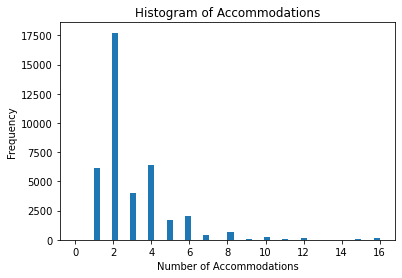

In [63]:
# visualize distribution of price (target variable)
plt.hist(data['accommodates'], bins=50)
plt.title("Histogram of Accommodations")
plt.xlabel("Number of Accommodations")
plt.ylabel("Frequency")
plt.show()

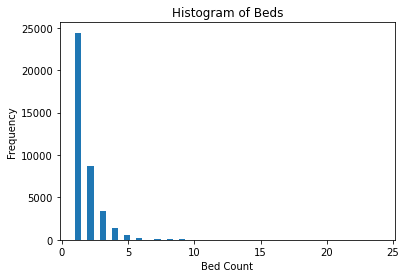

In [67]:
# visualize distribution of beds
plt.hist(data['beds'], bins=50)
plt.title("Histogram of Beds")
plt.xlabel("Bed Count")
plt.ylabel("Frequency")
plt.show()

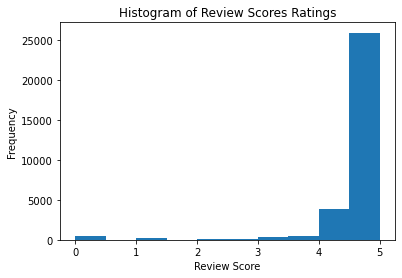

In [68]:
# visualize distribution of review scores ratings
plt.hist(data['review_scores_rating'][~data['review_scores_rating'].isnull()])
plt.title("Histogram of Review Scores Ratings")
plt.xlabel("Review Score")
plt.ylabel("Frequency")
plt.show()

In [73]:
# turn NaN scores with 0 reviews into 'No Reviews'
idx_vals = data['review_scores_rating'][data['number_of_reviews'] == 0].index.values.tolist()
data.loc[idx_vals, ('review_scores_rating')] = data['review_scores_rating'][data['number_of_reviews'] == 0].replace('NaN', 'No Reviews')

# remove inconsistent NaN values
data = data[~data['review_scores_rating'].isnull()]

In [91]:
# convert review_scores_rating into buckets
def convert_scores_buckets(val):
    if val == 'No Reviews':
        return 'No Reviews'
    elif val >= 95.0:
        return '95-100'
    elif val >= 90.0 and val < 95.0:
        return '90-94'
    elif val >= 85.0 and val < 90.0:
        return '85-89'
    elif val >= 80.0 and val < 85.0:
        return '80-84'
    elif val >= 70.0 and val < 80.0:
        return '70-79'
    elif val >= 60.0 and val < 70.0:
        return '60-69'
    elif val >= 50.0 and val < 60.0:
        return '50-59'
    elif val >= 40.0 and val < 50.0:
        return '40-49'
    elif val >= 30.0 and val < 40.0:
        return '30-39'
    elif val >= 20.0 and val < 30.0:
        return '20-29'
    elif val >= 10.0 and val < 20.0:
        return '10-19'
    elif val < 10.0:
        return '0-9'

SyntaxError: invalid syntax (830570921.py, line 1)